In [1]:
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.duplicated().sum()

np.int64(1)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.drop('species', axis=1, inplace=True)

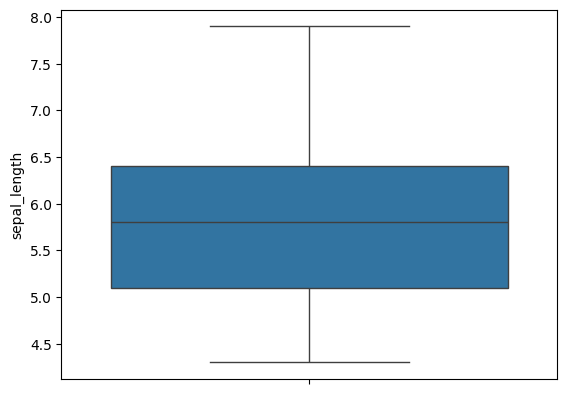

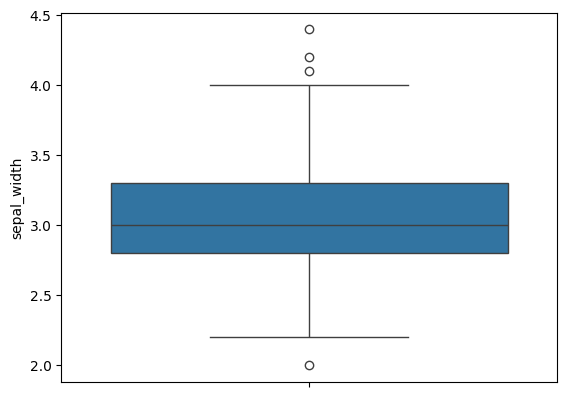

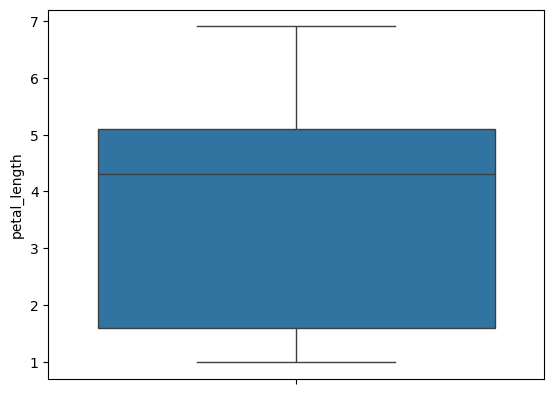

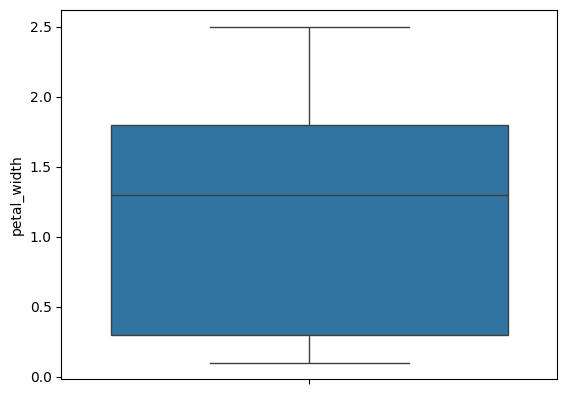

In [9]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [10]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

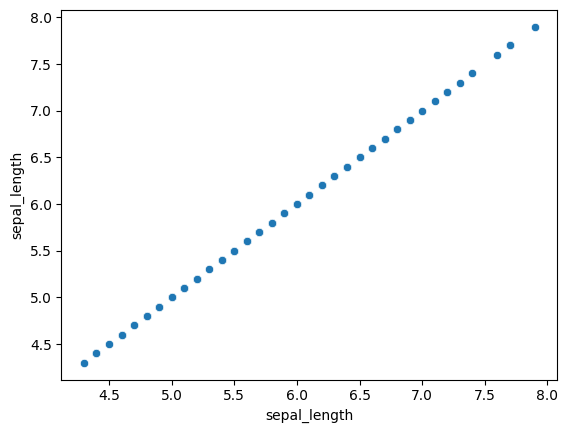

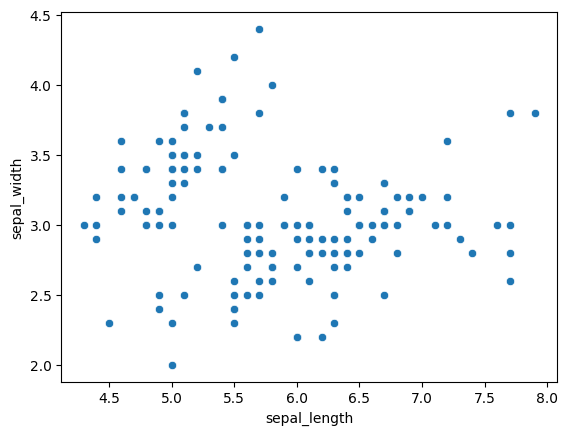

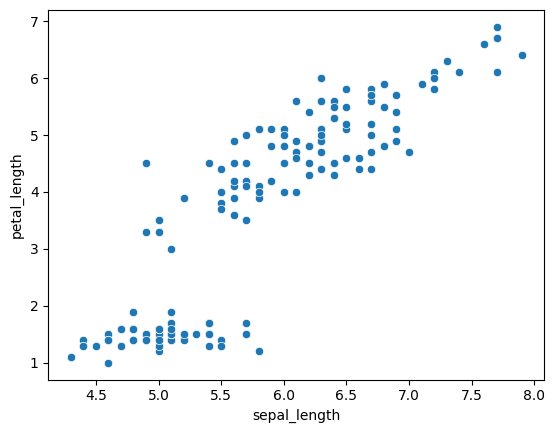

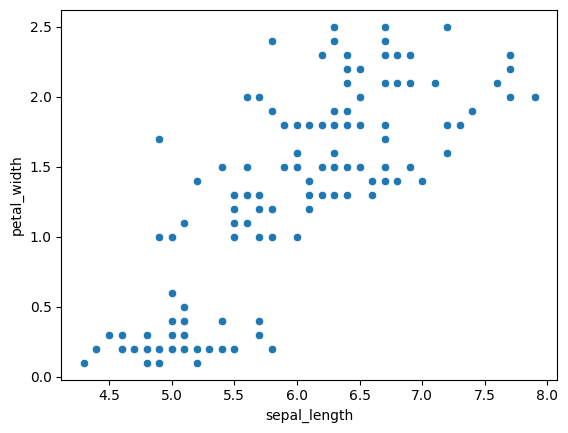

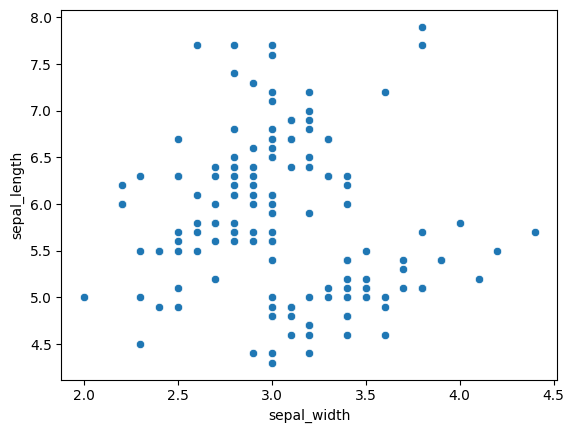

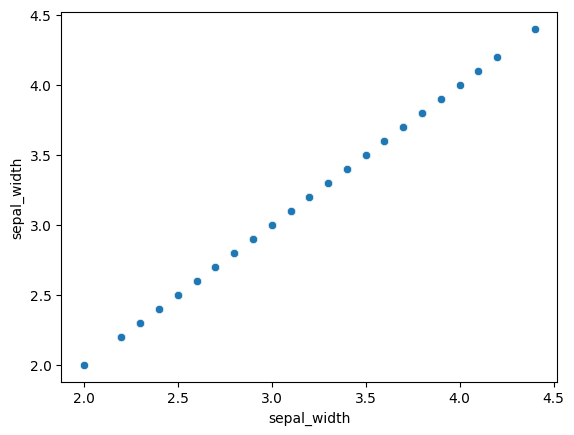

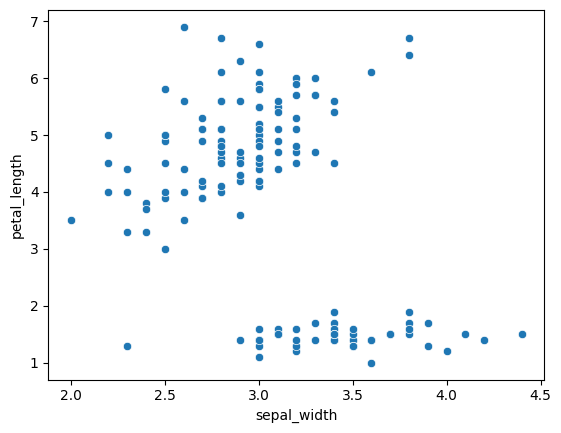

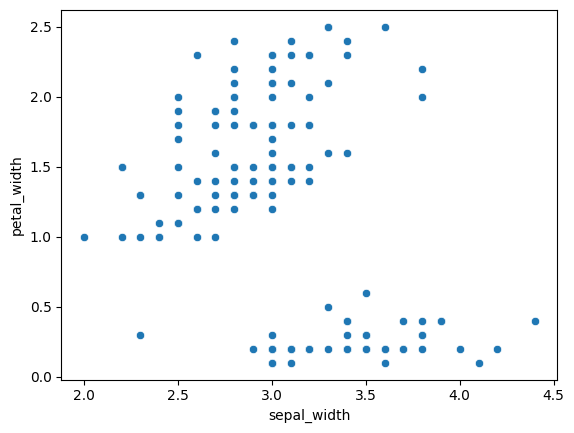

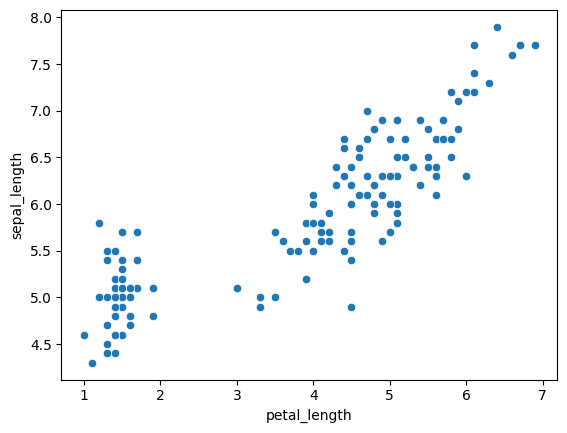

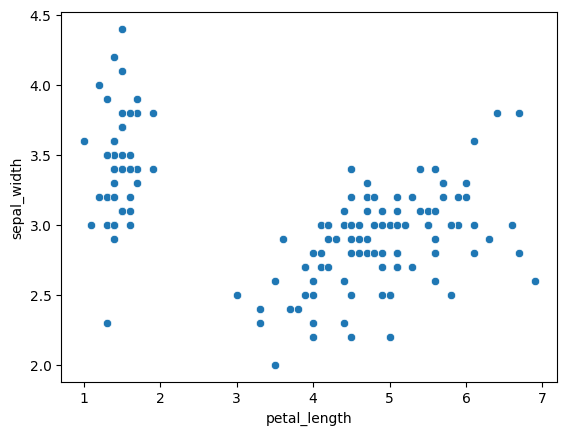

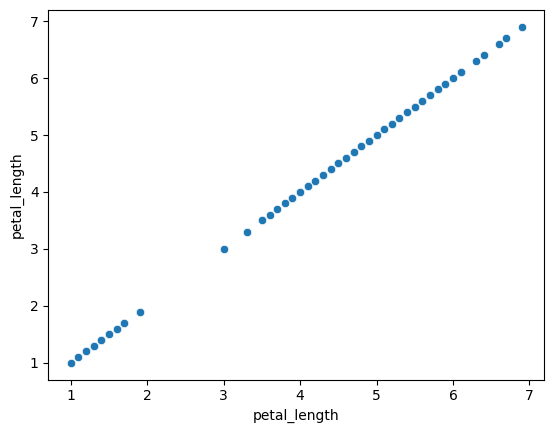

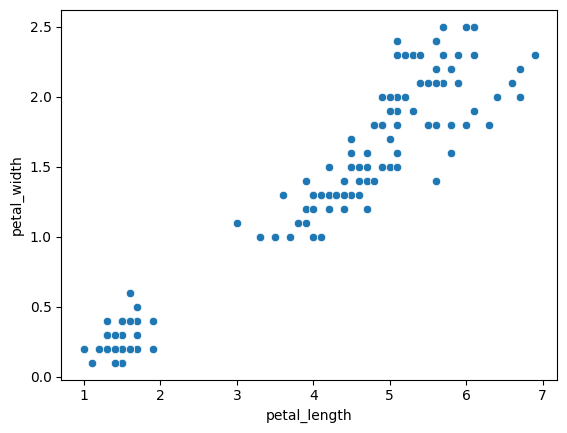

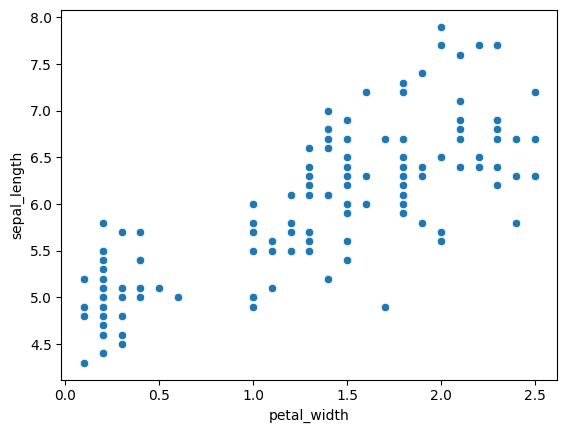

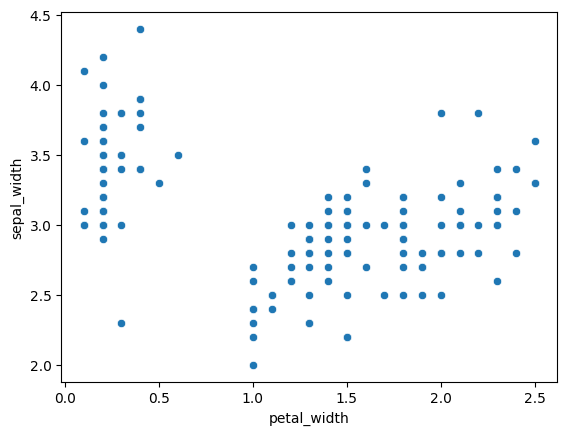

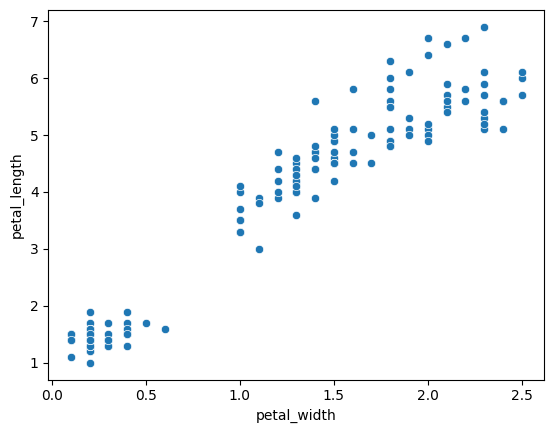

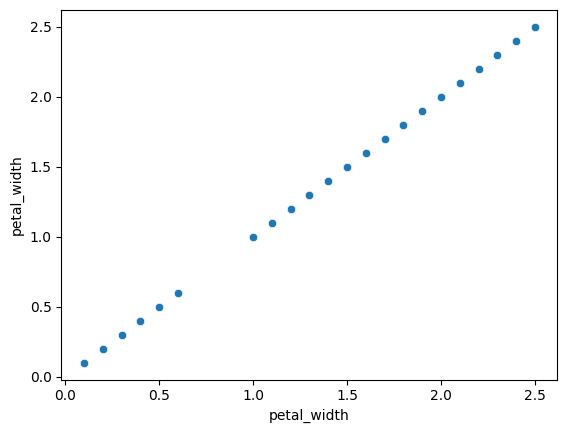

In [11]:
length = len(df.columns)
for i in range(length):
    for j in range(length):
        sns.scatterplot(x=df[df.columns[i]], y=df[df.columns[j]])
        plt.xlabel(df.columns[i])
        plt.ylabel(df.columns[j])
        plt.show()

In [12]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
y_predicted= km.fit_predict(df[['petal_length','petal_width']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [13]:
df['clusters']= y_predicted

<Axes: xlabel='petal_length', ylabel='petal_width'>

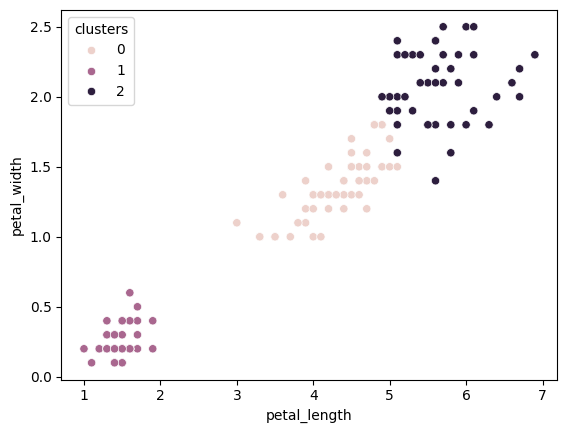

In [14]:
sns.scatterplot(x=df['petal_length'], y= df['petal_width'], hue = df['clusters'])

In [15]:
wcss = []
k_rng = range(1,10)
for i in range(1,10):
    k = KMeans(n_clusters=i)
    k.fit(df[['petal_length','sepal_width']])
    wcss.append(k.inertia_)

Text(0, 0.5, 'wcss')

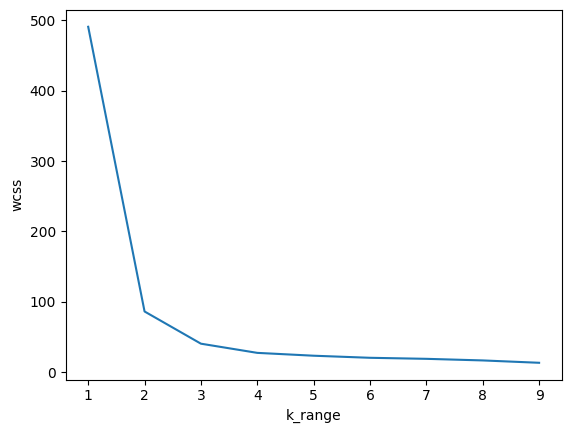

In [16]:
plt.plot(k_rng,wcss)
plt.xlabel('k_range')
plt.ylabel('wcss')